# **PROJECT 1 :  INSTAGRAM FAKE SPAMMER GENUINE ACCOUNTS**

# STEP 1 - IMPORT REQUIRED LIBRARIES




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.ensemble import RandomForestClassifier


# STEP 2 : LOAD DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

df_train = pd.read_csv("https://drive.google.com/uc?id=1O6TGXvlUIlnW0_gayOw2kpDJ7M-f0UZ5")
df_test = pd.read_csv("https://drive.google.com/uc?id=1AAnkZPsgwPN3-PmcBAeCdLmqQzGZlFsb")









# STEP 3 - PREVIEW DATASET

In [ ]:
df_train.head()
df_test.head()



,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0


# STEP 4 - EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
 # Check for missing values

df_train.isnull().sum()
df_test.isnull().sum()



,0
profile pic,0
nums/length username,0
fullname words,0
nums/length fullname,0
name==username,0
description length,0
external URL,0
private,0
#posts,0
#followers,0


In [ ]:
# Basic statistics of each column

df_train.describe()
df_test.describe()



,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000,120.000000
mean,0.758333,0.179917,1.550000,0.071333,0.041667,27.200000,0.100000,0.308333,82.866667,4.959472e+04,779.266667,0.500000
std,0.429888,0.241492,1.187116,0.209429,0.200664,42.588632,0.301258,0.463741,230.468136,3.816126e+05,1409.383558,0.502096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.725000e+01,119.250000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2.165000e+02,354.500000,0.500000
75%,1.000000,0.330000,2.000000,0.000000,0.000000,45.250000,0.000000,1.000000,58.250000,5.932500e+02,668.250000,1.000000
max,1.000000,0.890000,9.000000,1.000000,1.000000,149.000000,1.000000,1.000000,1879.000000,4.021842e+06,7453.000000,1.000000


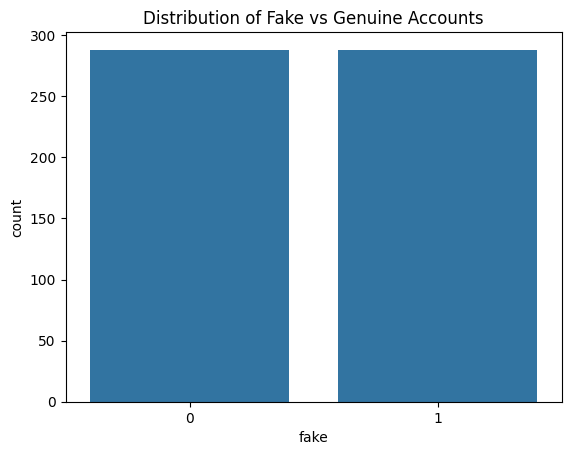

In [ ]:
# Distribution of Target Variable

sns.countplot(x='fake', data=df_train)
plt.title("Distribution of Fake vs Genuine Accounts")
plt.show()

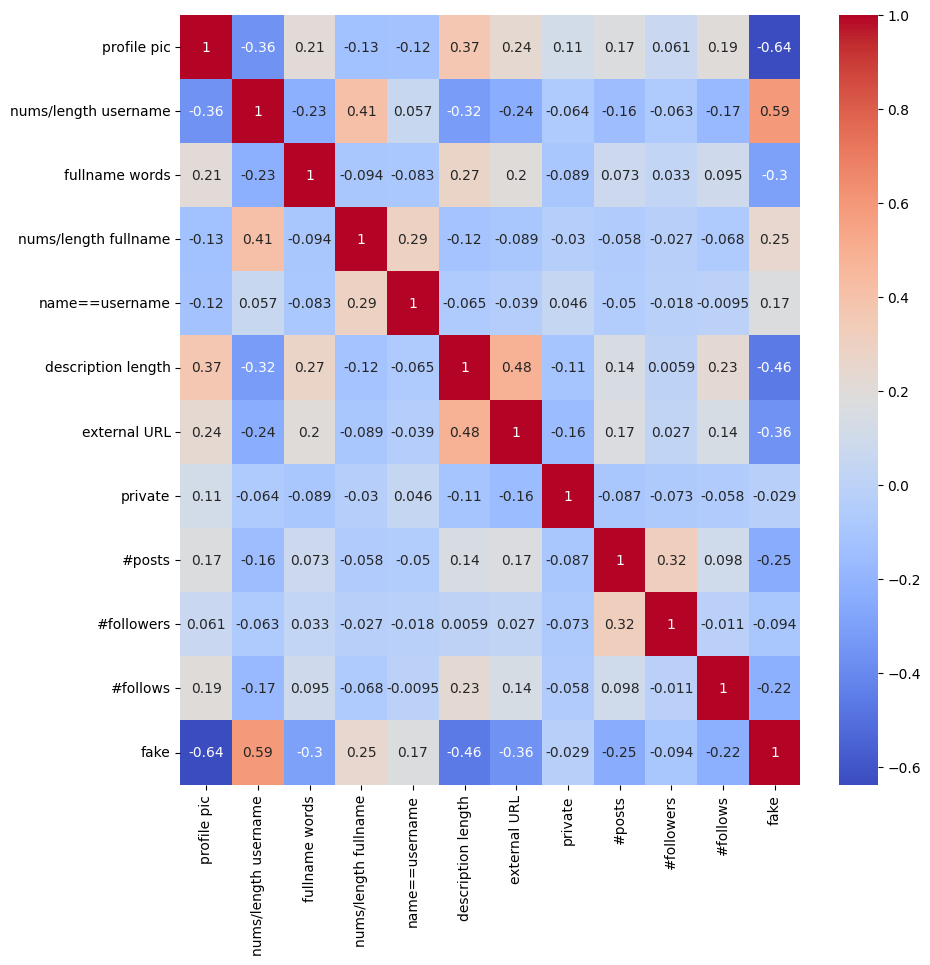

In [ ]:
# Correlation Heatmap

plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')
plt.show()


# STEP 5 - FEATURE ENGINEERING

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_train.drop('fake', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns=df_train.columns.drop('fake'))
scaled_data['fake'] = df_train['fake']


# STEP 6 - MODEL BUILIDING

In [ ]:
# Split dataset

X = scaled_data.drop('fake', axis=1)
y = scaled_data['fake']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [ ]:
 # Build Random Forest Model

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

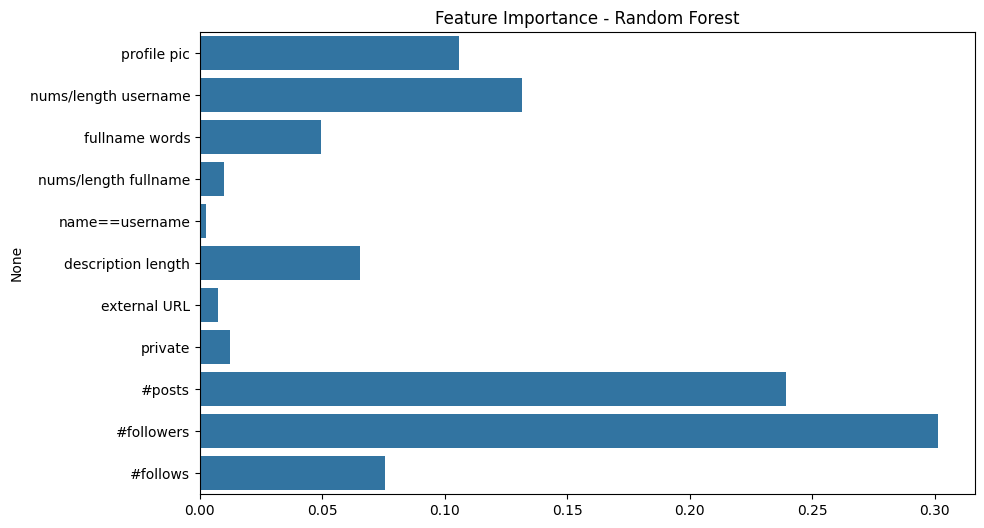

In [ ]:
 # Feature Importance Plot

feature_importance = model.feature_importances_
features = X_train.columns

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance, y=features)
plt.title("Feature Importance - Random Forest")
plt.show()

# STEP 7 - MODEL EVALUATION

In [ ]:
 # Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.930635838150289
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        93
           1       0.95      0.90      0.92        80

    accuracy                           0.93       173
   macro avg       0.93      0.93      0.93       173
weighted avg       0.93      0.93      0.93       173

Confusion Matrix:
 [[89  4]
 [ 8 72]]


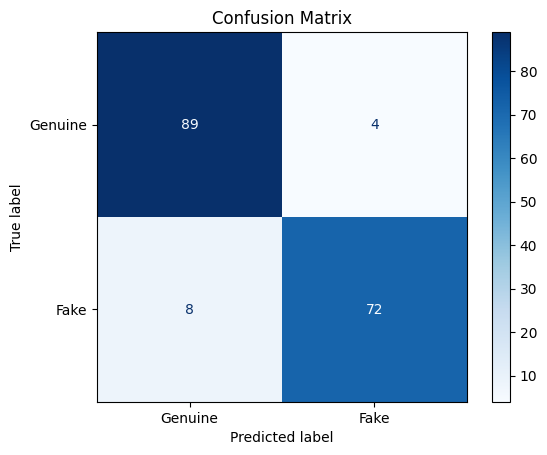

In [ ]:
# Visualize Confusion Matrix

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    display_labels=['Genuine', 'Fake'],
    cmap='Blues'
)
plt.title("Confusion Matrix")
plt.show()


# STEP 8 : HYPERPARAMETER TUNING USING GRID SEARCH

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit Grid Search to training data
grid_search.fit(X_train, y_train)

# Best parameters from Grid Search
print("Best parameters found:", grid_search.best_params_)

# Best estimator
best_rf = grid_search.best_estimator_

# Evaluate on test set
y_pred_best = best_rf.predict(X_test)
print(f"Accuracy with best params: {accuracy_score(y_test, y_pred_best):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy with best params: 0.9133
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        93
           1       0.92      0.89      0.90        80

    accuracy                           0.91       173
   macro avg       0.91      0.91      0.91       173
weighted avg       0.91      0.91      0.91       173

